# Importaciones

In [179]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Carga de datos

In [180]:
# Cargar los datos
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sample_df = pd.read_csv('data/sample_submission.csv')

# Primeras exploraciones

In [181]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           391 non-null    int64  
 1   Price_euros  391 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.2 KB


In [182]:
train_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.0
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.0
3,864,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.0
4,1176,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0


In [183]:
test_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,824,833,Lenovo,ThinkPad X1,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13kg
1,101,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg
2,1157,1175,Lenovo,ThinkPad T460s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12GB,512GB SSD,Intel HD Graphics 520,Windows 7,1.4kg
3,940,954,HP,Omen 17-W006na,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,2.75kg
4,853,864,Lenovo,ThinkPad T470p,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.96kg


In [184]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [185]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                391 non-null    int64  
 1   laptop_ID         391 non-null    int64  
 2   Company           391 non-null    object 
 3   Product           391 non-null    object 
 4   TypeName          391 non-null    object 
 5   Inches            391 non-null    float64
 6   ScreenResolution  391 non-null    object 
 7   Cpu               391 non-null    object 
 8   Ram               391 non-null    object 
 9   Memory            391 non-null    object 
 10  Gpu               391 non-null    object 
 11  OpSys             391 non-null    object 
 12  Weight            391 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 39.8+ KB


In [186]:
train_df.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.00000
mean,652.099781,661.273026,15.060746,1126.92034
std,375.428905,380.297415,1.412363,696.08887
min,0.000000,1.000000,10.100000,174.00000
25%,332.500000,338.500000,14.000000,589.00000
50%,655.500000,663.500000,15.600000,952.00000
75%,980.500000,994.500000,15.600000,1499.00000
max,1301.000000,1319.000000,18.400000,4899.00000


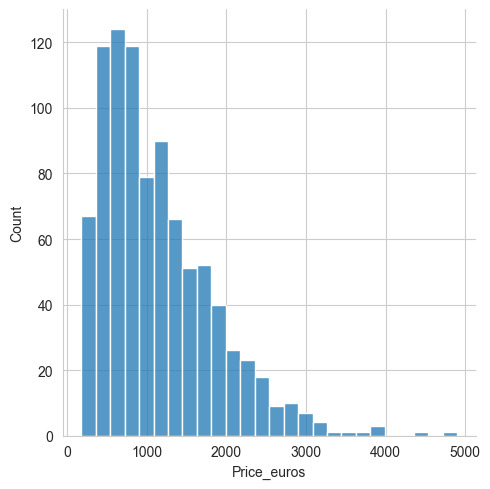

In [187]:
sns.displot(train_df['Price_euros']);

In [188]:
train_df[['Price_euros', 'Inches']].corr()

,Price_euros,Inches
Price_euros,1.000000,0.070152
Inches,0.070152,1.000000


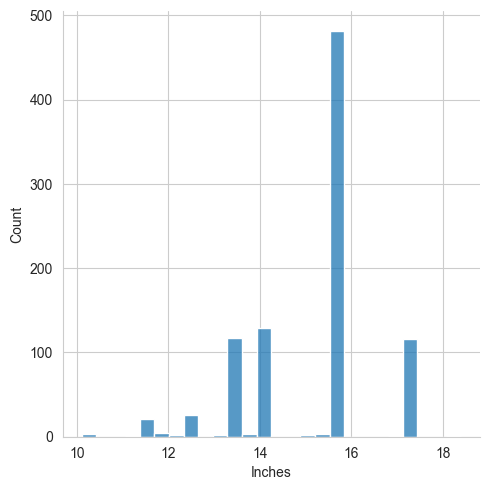

In [189]:
sns.displot(train_df['Inches']);

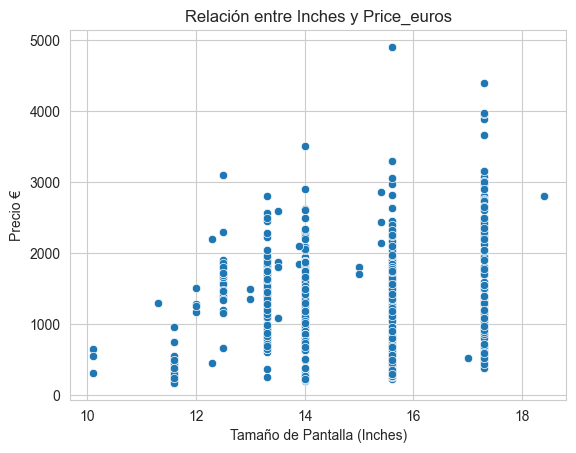

In [190]:
sns.scatterplot(data=train_df, x='Inches', y='Price_euros')
plt.title("Relación entre Inches y Price_euros")
plt.xlabel("Tamaño de Pantalla (Inches)")
plt.ylabel("Precio €")
plt.show()

# Limpieza de datos

In [191]:
train_df['Company'].unique()

array(['Asus', 'Lenovo', 'Dell', 'Mediacom', 'Toshiba', 'HP', 'Acer',
       'Apple', 'MSI', 'Fujitsu', 'Samsung', 'Chuwi', 'Microsoft',
       'Razer', 'Xiaomi', 'Huawei', 'Google', 'Vero', 'LG'], dtype=object)

In [192]:
train_df['Company'].value_counts()

Company
Dell         218
HP           197
Lenovo       193
Asus         110
Acer          76
Toshiba       37
MSI           36
Apple         17
Mediacom       6
Samsung        5
Microsoft      4
Razer          4
Xiaomi         2
Huawei         2
Fujitsu        1
Chuwi          1
Google         1
Vero           1
LG             1
Name: count, dtype: int64

In [193]:
# Cambiar temporalmente el límite de filas mostradas
with pd.option_context('display.max_rows', None):
    print(train_df['Product'].value_counts())

Product
Inspiron 3567                                    24
XPS 13                                           21
Vostro 3568                                      15
250 G6                                           13
Legion Y520-15IKBN                               12
Inspiron 5570                                    12
Alienware 17                                     11
Inspiron 5567                                    11
Inspiron 7567                                    10
Satellite Pro                                    10
Latitude 5580                                    10
ProBook 450                                      10
Aspire 3                                          9
MacBook Pro                                       9
EliteBook 840                                     9
Vostro 5568                                       8
ProBook 650                                       6
ThinkPad X1                                       6
ThinkPad Yoga                                     6
Elit

In [194]:
train_df['TypeName'].value_counts()

TypeName
Notebook              516
Gaming                143
Ultrabook             130
2 in 1 Convertible     84
Workstation            22
Netbook                17
Name: count, dtype: int64

In [195]:
train_df['OpSys'].value_counts()

OpSys
Windows 10      745
No OS            46
Linux            46
Windows 7        33
Chrome OS        18
macOS            11
Mac OS X          6
Windows 10 S      5
Android           2
Name: count, dtype: int64

In [196]:
columns_to_drop = ['laptop_ID', 'Company', 'Product', 'OpSys']
train_df = train_df.drop(columns=columns_to_drop)

In [197]:
train_df.head()

,id,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros
0,697,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,1.2kg,669.0
1,435,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,3.2kg,1695.0
2,735,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,1.85kg,779.0
3,864,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,1.29kg,2240.0
4,1176,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,2.32kg,825.0


In [198]:
# Procesar la columna 'Weight' y convertirla a numérico
train_df['Weight'] = train_df['Weight'].str.replace('kg', '').astype(float)
test_df['Weight'] = test_df['Weight'].str.replace('kg', '').astype(float)

# Procesar la columna 'Ram' y convertirla a numérico
train_df['Ram'] = train_df['Ram'].str.replace('GB', '').astype(int)
test_df['Ram'] = test_df['Ram'].str.replace('GB', '').astype(int)

# Extraer la resolución de pantalla y combinarla en una sola columna 'Resolution'
train_df[['res_width', 'res_height']] = train_df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(float)
test_df[['res_width', 'res_height']] = test_df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(float)

# Combinar 'res_width' y 'res_height' en una sola columna 'Resolution'
train_df['Resolution'] = train_df['res_width'] * train_df['res_height']
test_df['Resolution'] = test_df['res_width'] * test_df['res_height']

# Eliminar las columnas 'res_width' y 'res_height' ya que se combinan en 'Resolution'
train_df = train_df.drop(columns=['res_width', 'res_height'])
test_df = test_df.drop(columns=['res_width', 'res_height'])

# Procesar la columna 'Memory' y convertirla a numérico (GB)
def parse_memory(memory_str):
    if isinstance(memory_str, str):
        memory_str = memory_str.strip().lower()
        if 'gb' in memory_str:
            return int(float(memory_str.split('gb')[0].strip()))  # Extraer el número antes de 'GB'
        elif 'tb' in memory_str:
            return int(float(memory_str.split('tb')[0].strip()) * 1024)  # Convertir TB a GB
    return 0

train_df['Memory'] = train_df['Memory'].apply(parse_memory)
test_df['Memory'] = test_df['Memory'].apply(parse_memory)

# Procesar la columna 'Cpu' y extraer información más precisa (extraigo el número de núcleos y frecuencia si están disponibles)
def parse_cpu(cpu_str):
    if isinstance(cpu_str, str):
        cpu_str = cpu_str.strip().lower()
        # Extraer el número de núcleos y la frecuencia
        cores = [int(s) for s in cpu_str.split() if s.isdigit() and 'core' in cpu_str]
        frequency = [float(s.replace('ghz', '').strip()) for s in cpu_str.split() if 'ghz' in s]
        cores = cores[0] if cores else 0
        freq = frequency[0] if frequency else 0
        return cores * 10 + freq  # Combina el número de núcleos y la frecuencia
    return 0

train_df['Cpu'] = train_df['Cpu'].apply(parse_cpu)
test_df['Cpu'] = test_df['Cpu'].apply(parse_cpu)

# Procesar la columna 'Gpu' y asignar un valor numérico basado en el modelo de GPU
def parse_gpu(gpu_str):
    if isinstance(gpu_str, str):
        gpu_str = gpu_str.strip().lower()
        # Asignamos un valor numérico basado en el modelo de GPU
        if 'nvidia' in gpu_str:
            if 'gtx' in gpu_str:
                return 2  # Representa GPUs NVIDIA GTX
            elif 'rtx' in gpu_str:
                return 3  # Representa GPUs NVIDIA RTX
            else:
                return 1  # Representa otros tipos de NVIDIA
        elif 'amd' in gpu_str:
            return 4  # Representa GPUs AMD
        else:
            return 0  # Otros tipos de GPU o sin GPU
    return 0

train_df['Gpu'] = train_df['Gpu'].apply(parse_gpu)
test_df['Gpu'] = test_df['Gpu'].apply(parse_gpu)

# Procesar la columna 'TypeName' y convertirla a variables numéricas con One-Hot Encoding
train_df = pd.get_dummies(train_df, columns=['TypeName'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['TypeName'], drop_first=True)

# Seleccionar las características que usaremos para el modelo
features_to_use_improved = ['Inches', 'Ram', 'Weight', 'Memory', 'Resolution', 'Cpu', 'Gpu'] + [col for col in train_df.columns if col.startswith('TypeName_')]

# Crear los conjuntos de entrenamiento y prueba
X_train_improved = train_df[features_to_use_improved]
X_test_improved = test_df[features_to_use_improved]

# Separar la variable objetivo (target)
y_train = train_df['Price_euros']

# Dividir los datos en conjunto de entrenamiento y validación
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_improved, y_train, test_size=0.2, random_state=42)

# Aplicar la transformación logarítmica para hacer la distribución más normal
y_train_log = np.log1p(y_train_split)
y_val_log = np.log1p(y_val_split)


In [199]:
y_train_log.info()

<class 'pandas.core.series.Series'>
Index: 729 entries, 25 to 102
Series name: Price_euros
Non-Null Count  Dtype  
--------------  -----  
729 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


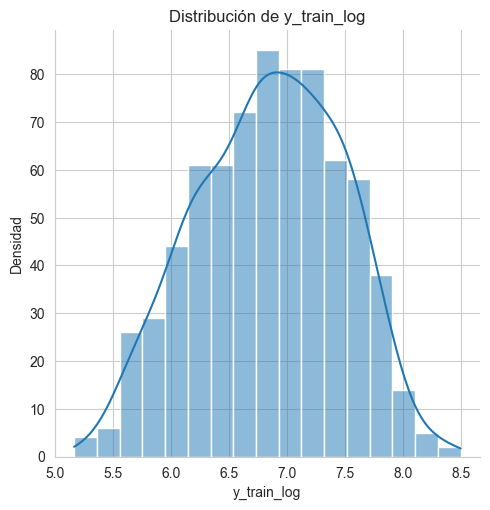

In [200]:
# Visualizar la distribución de y_train_log
sns.displot(y_train_log, kde=True)  # kde=True añade la línea de densidad
plt.title('Distribución de y_train_log')
plt.xlabel('y_train_log')
plt.ylabel('Densidad')
plt.show()

In [201]:
X_train_improved.head()

,Inches,Ram,Weight,Memory,Resolution,Cpu,Gpu,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,12.5,4,1.20,64,2073600.0,0.9,0,False,False,False,False,False
1,17.3,8,3.20,256,2073600.0,3.2,4,True,False,False,False,False
2,15.6,4,1.85,1024,2073600.0,2.7,0,False,False,True,False,False
3,13.3,16,1.29,512,5760000.0,2.5,0,False,False,False,True,False
4,15.6,4,2.32,1024,2073600.0,2.5,0,False,False,True,False,False


Entrenando modelo: Random Forest...
Entrenando modelo: Gradient Boosting...
Entrenando modelo: XGBoost...
Tabla de Importancia de Características:
                      Random Forest  Gradient Boosting   XGBoost  \
Ram                        0.543154           0.531636  0.329979   
TypeName_Notebook          0.069372           0.095321  0.195073   
TypeName_Workstation       0.028236           0.034863  0.265926   
Weight                     0.135947           0.099800  0.020147   
Cpu                        0.089241           0.087237  0.036207   
Resolution                 0.038097           0.069151  0.046057   
Memory                     0.043564           0.030873  0.019168   
Inches                     0.032091           0.032403  0.024545   
Gpu                        0.012244           0.013128  0.024913   
TypeName_Gaming            0.003159           0.004877  0.023480   
TypeName_Ultrabook         0.004391           0.000488  0.011914   
TypeName_Netbook           0.000502  

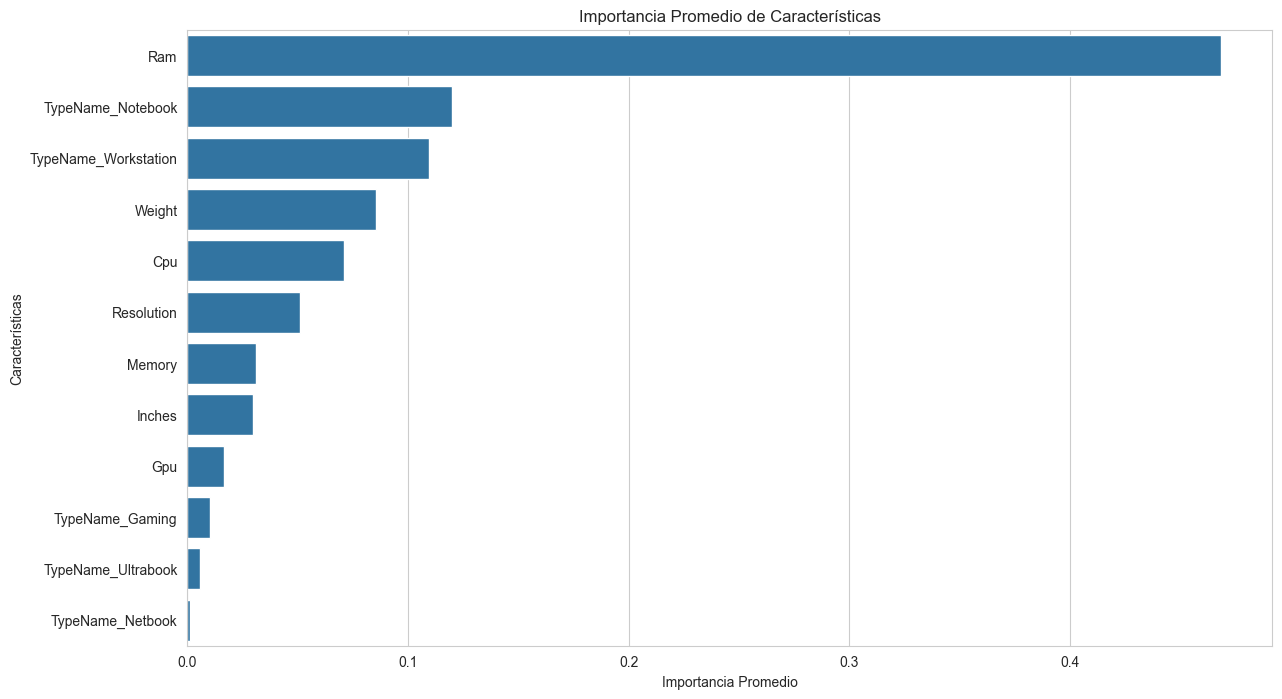

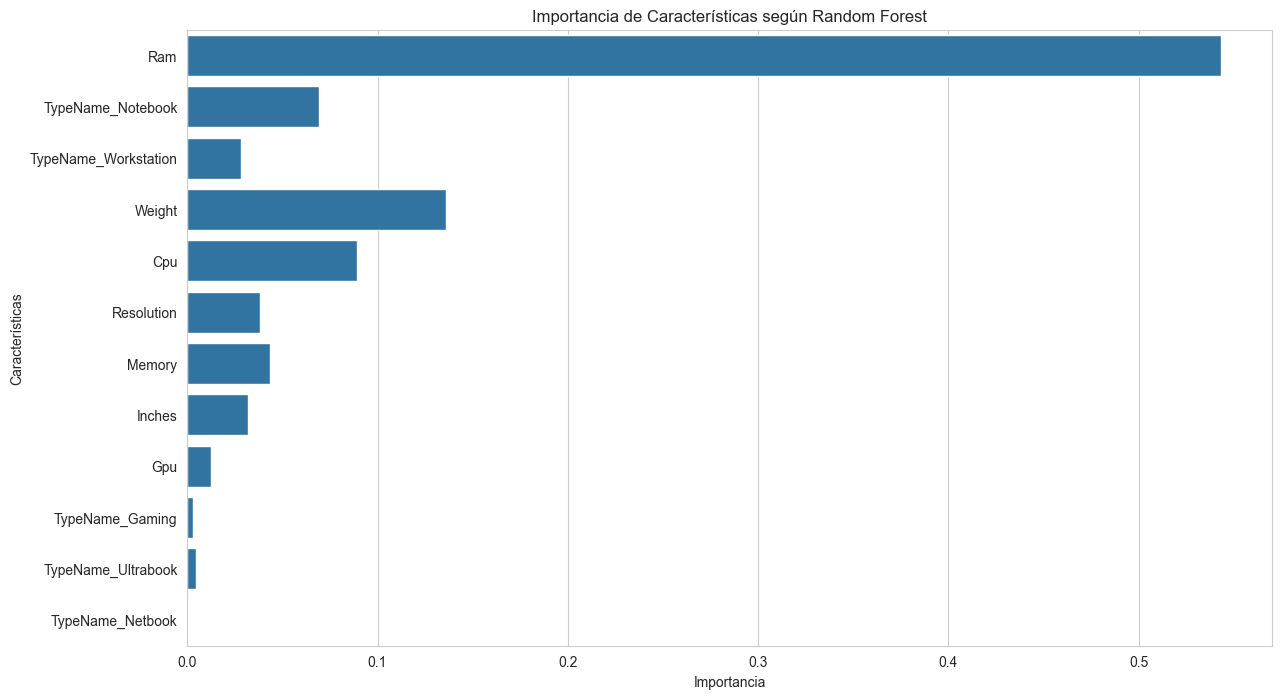

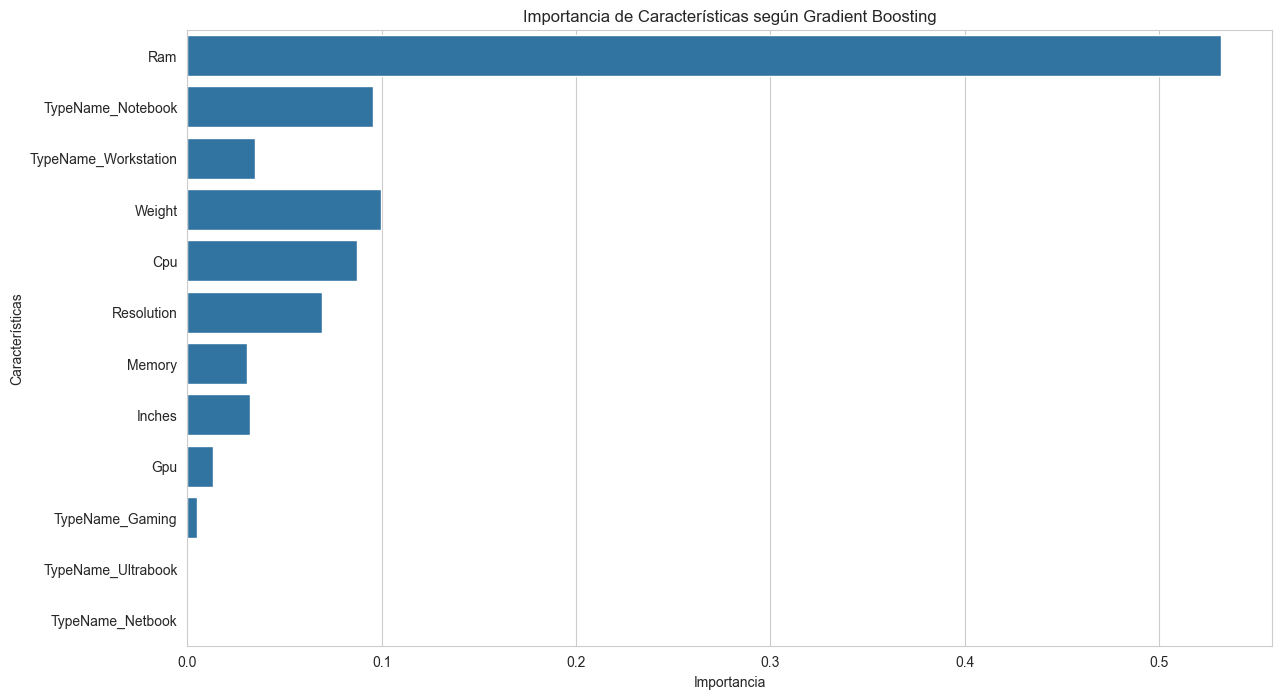

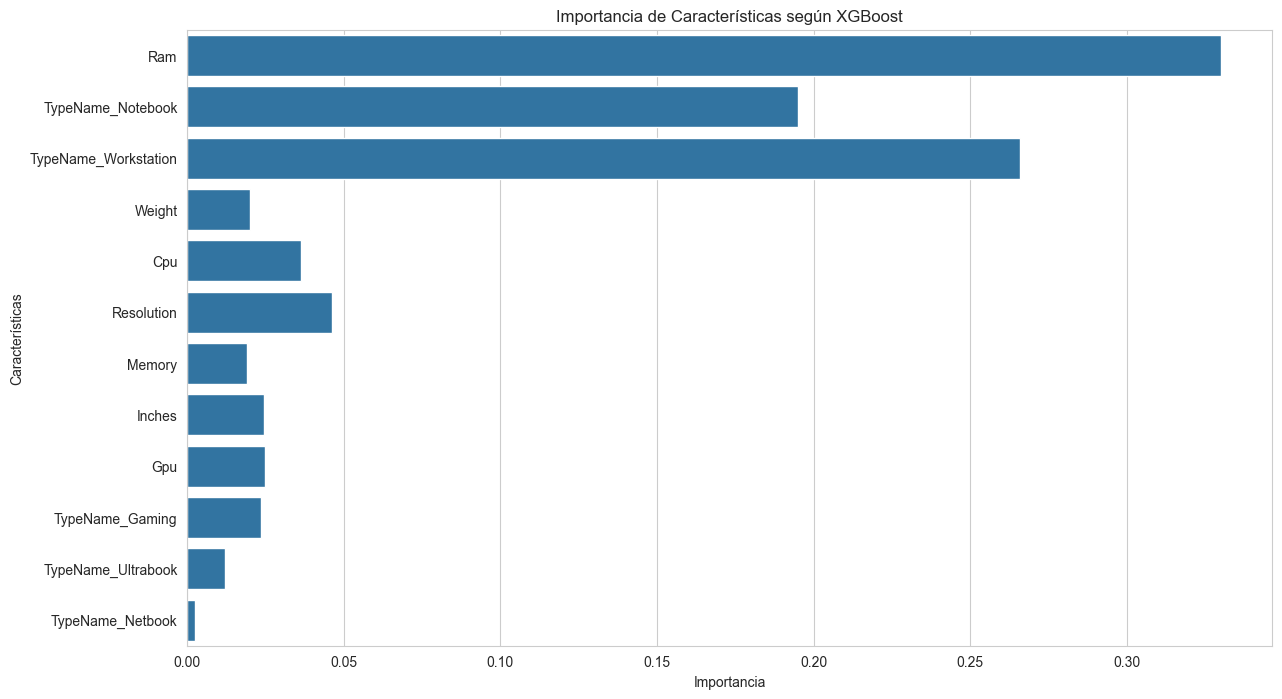

In [202]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir modelos a usar
models = {
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1)
}

# Crear un DataFrame para almacenar las importancias de características
feature_importances = pd.DataFrame(index=X_train_improved.columns)

# Iterar sobre los modelos para calcular importancias
for model_name, model in models.items():
    print(f"Entrenando modelo: {model_name}...")
    model.fit(X_train_improved, y_train)  # Entrenar modelo
    
    # Obtener importancias de características y agregarlas a la tabla
    feature_importances[model_name] = model.feature_importances_

# Calcular el promedio de importancias
feature_importances['Average Importance'] = feature_importances.mean(axis=1)

# Ordenar las características por su importancia promedio
feature_importances = feature_importances.sort_values(by='Average Importance', ascending=False)

# Mostrar la tabla de importancias
print("Tabla de Importancia de Características:")
print(feature_importances)

# Visualización de importancias
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={'index': 'Feature'}, inplace=True)

plt.figure(figsize=(14, 8))

# Crear un gráfico por modelo
sns.barplot(data=feature_importances, x='Average Importance', y='Feature', orient='h')
plt.title("Importancia Promedio de Características")
plt.xlabel("Importancia Promedio")
plt.ylabel("Características")
plt.show()

# Gráfico separado por modelo
for model_name in models.keys():
    plt.figure(figsize=(14, 8))
    sns.barplot(data=feature_importances, x=model_name, y='Feature', orient='h')
    plt.title(f"Importancia de Características según {model_name}")
    plt.xlabel("Importancia")
    plt.ylabel("Características")
    plt.show()

## Definir modelos mas adecuados para predecir y evaluar su rendimiento

In [208]:

# Definir los modelos y sus hiperparámetros
models_params = {
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [100, 150],
            "max_depth": [6, 8, 10],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2, 3],
        },
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 150, 200],
            "learning_rate": [0.01, 0.05, 0.08],
            "max_depth": [6, 8],
            "subsample": [0.8, 1.0],
        },
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42, n_jobs=-1, eval_metric='logloss'),
        "params": {
            "n_estimators": [100, 150, 200, 250],
            "max_depth": [6, 8],
            "learning_rate": [0.05, 0.08, 1.0],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8],
        },
    },
}

# Diccionario para almacenar resultados
results = {}

# Iterar sobre los modelos y realizar GridSearchCV
for model_name, config in models_params.items():
    print(f"Optimizing {model_name}...")
    grid_search = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        cv=5,
        scoring="neg_mean_absolute_error",
        n_jobs=-1,
        verbose=2,
    )
    grid_search.fit(X_train_split, y_train_log)
    
    # Obtener el mejor modelo y evaluar
    best_model = grid_search.best_estimator_
    y_pred_log = best_model.predict(X_val_split)
    y_pred = np.expm1(y_pred_log)  # Invertir logaritmo para obtener valores originales
    mae = mean_absolute_error(y_val_split, y_pred)
    
    print(f"Mejores parámetros para {model_name}: {grid_search.best_params_}")
    print(f"MAE para {model_name}: {mae}")
    
    # Guardar resultados
    results[model_name] = {
        "best_model": best_model,
        "best_params": grid_search.best_params_,
        "mae": mae,
    }

# Mostrar el modelo con mejor rendimiento
best_model_name = min(results, key=lambda x: results[x]["mae"])
print(f"El mejor modelo es {best_model_name} con un MAE de {results[best_model_name]['mae']}")



Optimizing Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros para Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MAE para Random Forest: 206.27888147227412
Optimizing Gradient Boosting...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros para Gradient Boosting: {'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
MAE para Gradient Boosting: 182.7868856097443
Optimizing XGBoost...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros para XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
MAE para XGBoost: 186.24519958162568
El mejor modelo es Gradient Boosting con un MAE de 182.7868856097443


## Predicciones y archivo salida

In [204]:
# Predecir en el conjunto de prueba
y_pred_test_log = best_model.predict(X_test_improved)

# Invertir la transformación logarítmica para obtener los valores de precio originales
y_pred_test = np.expm1(y_pred_test_log)

# Crear un DataFrame con los resultados
output_df = test_df[['id']]
output_df['Price_euros'] = y_pred_test

# Guardar el archivo CSV de salida
output_df.to_csv('laptop_price_predictions.csv', index=False)
print('Archivo de predicciones guardado como laptop_price_predictions.csv')


Archivo de predicciones guardado como laptop_price_predictions.csv


C:\Users\mikel\AppData\Local\Temp\ipykernel_15892\3630082334.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df['Price_euros'] = y_pred_test
